## Lab Assignment 6

### 1.	Write a program for edge detection using following methods:

•Roberts,                                                                       

•Prewitt, 

•Sobel

•	Canny

Study the effect of these filters over input image and compare the results.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import camera 
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage import feature

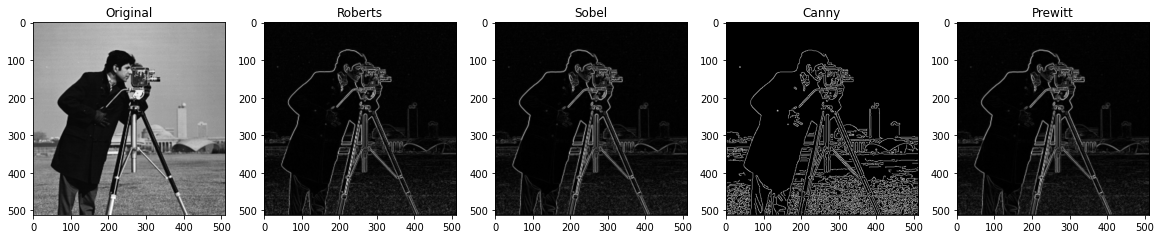

In [3]:
image = camera()

edge_roberts = roberts(image)
edge_sobel = sobel(image)
edge_canny = feature.canny(image)
edge_prewitt = prewitt(image)

fig, axs = plt.subplots(1, 5, figsize=(20,20))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original')

axs[1].imshow(edge_roberts, cmap=plt.cm.gray)
axs[1].set_title('Roberts')

axs[2].imshow(edge_sobel, cmap=plt.cm.gray)
axs[2].set_title('Sobel')

axs[3].imshow(edge_canny, cmap=plt.cm.gray)
axs[3].set_title('Canny')

axs[4].imshow(edge_prewitt, cmap=plt.cm.gray)
axs[4].set_title('Prewitt')

plt.show()

# 2.	Compare the results obtained by following two approaches.

a)	Edge detection using Laplacian mask

Laplacian from scratch

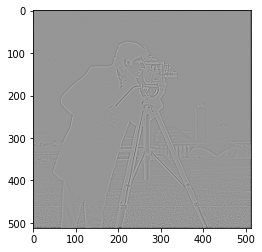

In [9]:
img = camera()
img_lap = np.pad(img,((1,1),(1,1)))
lap_mask = np.array([[0,1,0],[1,-4,1],[0,1,0]])
n_h , n_w = img.shape
img_new = np.zeros(img.shape)
for i in range(n_h):
    for j in range(n_w):
        vert_start= i 
        vert_end= i+3
        horiz_start= j 
        horiz_end=j+3
        img_new[i,j]= np.sum(np.multiply(lap_mask, img_lap[vert_start:vert_end, horiz_start:horiz_end]))
plt.imshow(img_new, cmap='gray')

Laplcaian using cv2

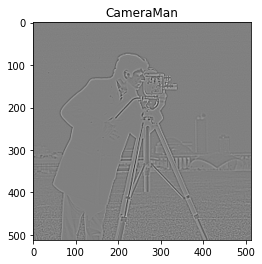

In [10]:
import cv2
import matplotlib.pyplot as plt

img = camera()
blur_img = cv2.GaussianBlur(img, (3, 3), 0)
laplacian = cv2.Laplacian(blur_img, cv2.CV_64F)

plt.figure()
plt.title('CameraMan')
plt.imshow(laplacian, cmap='gray')
plt.show()

b)	Apply Gaussian followed by Laplace to study LoG filter. Does it show an improvement? Justify

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  # Remove the CWD from sys.path while we load stuff.


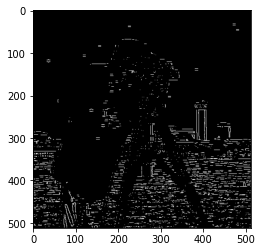

In [11]:
import scipy as sp
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from skimage import data    

img = camera()
LoG = nd.gaussian_laplace(img , 2)
thres = np.absolute(LoG).mean() * 0.75
output = sp.zeros(LoG.shape)
w = output.shape[1]
h = output.shape[0]

for y in range(1, h - 1):
    for x in range(1, w - 1):
        patch = LoG[y-1:y+2, x-1:x+2]
        p = LoG[y, x]
        maxP = patch.max()
        minP = patch.min()
        if (p > 0):
            zeroCross = True if minP < 0 else False
        else:
            zeroCross = True if maxP > 0 else False
        if ((maxP - minP) > thres) and zeroCross:
            output[y, x] = 1

plt.imshow(output, cmap='gray')
plt.show()

# 3.	Combining Spatial Enhancement Methods

Follow these steps:

a)	Read an input image (grayscale)

b)	Laplacian of a)

c)	Add a) and b). By this, sharpened image will be obtained

d)	Sobel of a)

e)	Sobel image smoothed with a 5*5 averaging filter

f)	Mask image formed by the product of (c) and (e).

g)	Sharpened image obtained by the sum of (a) and (f).


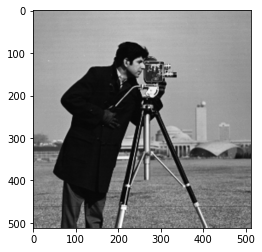

In [12]:
img = camera()
plt.imshow(img,cmap='gray')

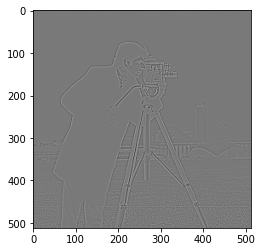

In [13]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
plt.imshow(laplacian,cmap='gray')

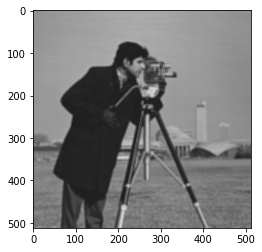

In [14]:
added_image = img + laplacian
plt.imshow(added_image,cmap='gray')

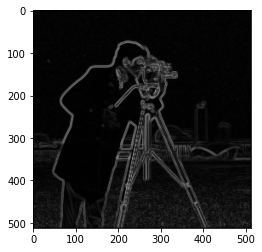

In [15]:
edge_sobel = sobel(added_image)
plt.imshow(edge_sobel,cmap='gray')

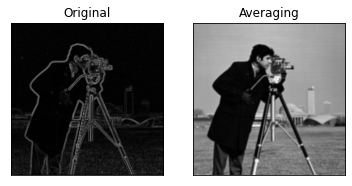

In [16]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(edge_sobel,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,cmap='gray'),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

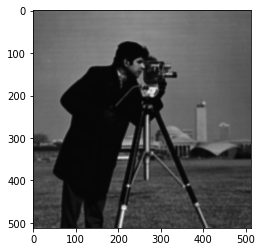

In [17]:
product_image = added_image * dst
plt.imshow(product_image,cmap='gray')

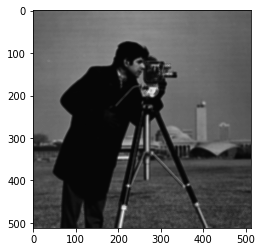

In [18]:
sharp_image = img + product_image
plt.imshow(sharp_image,cmap='gray')